In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
candy_data_csv = Path("Resources/Candy_Sales.csv")

candy_df = pd.read_csv(candy_data_csv)
candy_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


In [5]:
# create 2-dataframes with the date ranges of V-day and Halloween
# date range:
    # halloween: October
    # v-day: February
    # within the date ranges determine which type of candy has most units purchased
    # rank these types from high > low
      

reduced_candy_df= candy_df.loc[:, ["Order Date", "Product Name",
                                    "Units"]]
reduced_candy_df.head()

,Order Date,Product Name,Units
0,2021-03-31,Wonka Bar - Triple Dazzle Caramel,2
1,2021-03-31,Wonka Bar -Scrumdiddlyumptious,2
2,2021-09-15,Wonka Bar - Fudge Mallows,2
3,2021-09-15,Wonka Bar - Milk Chocolate,3
4,2022-10-04,Wonka Bar - Milk Chocolate,2


In [7]:
reduced_by_dates = pd.DataFrame(reduced_candy_df)
reduced_by_dates["Order Date"] =  pd.to_datetime(reduced_by_dates["Order Date"])

# Extract the month from the 'date' column
reduced_by_dates["Month"] = reduced_by_dates["Order Date"].dt.month

reduced_by_dates.head()


,Order Date,Product Name,Units,Month
0,2021-03-31,Wonka Bar - Triple Dazzle Caramel,2,3
1,2021-03-31,Wonka Bar -Scrumdiddlyumptious,2,3
2,2021-09-15,Wonka Bar - Fudge Mallows,2,9
3,2021-09-15,Wonka Bar - Milk Chocolate,3,9
4,2022-10-04,Wonka Bar - Milk Chocolate,2,10


In [9]:
# index all February data by month
feb_index = reduced_by_dates[reduced_by_dates["Month"] == 2]

print(feb_index)

# reset the index for data manipulation
feb_index.reset_index(drop=True, inplace=True)

feb_index

      Order Date                       Product Name  Units  Month
13    2022-02-03  Wonka Bar - Triple Dazzle Caramel      2      2
14    2022-02-03  Wonka Bar - Nutty Crunch Surprise      3      2
56    2021-02-18          Wonka Bar - Fudge Mallows      2      2
88    2023-02-02  Wonka Bar - Triple Dazzle Caramel      2      2
143   2022-02-18  Wonka Bar - Nutty Crunch Surprise      3      2
...          ...                                ...    ...    ...
9928  2023-02-22          Wonka Bar - Fudge Mallows      5      2
9950  2022-02-28  Wonka Bar - Nutty Crunch Surprise      8      2
9951  2022-02-28  Wonka Bar - Triple Dazzle Caramel      2      2
10049 2022-02-06     Wonka Bar -Scrumdiddlyumptious      3      2
10054 2024-02-11          Wonka Bar - Fudge Mallows      7      2

[300 rows x 4 columns]


,Order Date,Product Name,Units,Month
0,2022-02-03,Wonka Bar - Triple Dazzle Caramel,2,2
1,2022-02-03,Wonka Bar - Nutty Crunch Surprise,3,2
2,2021-02-18,Wonka Bar - Fudge Mallows,2,2
3,2023-02-02,Wonka Bar - Triple Dazzle Caramel,2,2
4,2022-02-18,Wonka Bar - Nutty Crunch Surprise,3,2
...,...,...,...,...
295,2023-02-22,Wonka Bar - Fudge Mallows,5,2
296,2022-02-28,Wonka Bar - Nutty Crunch Surprise,8,2
297,2022-02-28,Wonka Bar - Triple Dazzle Caramel,2,2
298,2022-02-06,Wonka Bar -Scrumdiddlyumptious,3,2


In [11]:
# Copy Feb DF and delete Order Date column
feb_index_copy=feb_index.copy()
feb_index_copy.drop("Order Date", axis=1, inplace=True)
feb_index_copy

,Product Name,Units,Month
0,Wonka Bar - Triple Dazzle Caramel,2,2
1,Wonka Bar - Nutty Crunch Surprise,3,2
2,Wonka Bar - Fudge Mallows,2,2
3,Wonka Bar - Triple Dazzle Caramel,2,2
4,Wonka Bar - Nutty Crunch Surprise,3,2
...,...,...,...
295,Wonka Bar - Fudge Mallows,5,2
296,Wonka Bar - Nutty Crunch Surprise,8,2
297,Wonka Bar - Triple Dazzle Caramel,2,2
298,Wonka Bar -Scrumdiddlyumptious,3,2


In [13]:
# Groupy by and assemble the resulting series into a single summary DataFrame.
    # check februrary's count
    # delete Order Date Column
feb_reduce = feb_index_copy.groupby("Product Name")["Units"].sum()
print(feb_reduce)

feb_data = feb_reduce.sort_values(ascending=False)
feb_data


Product Name
Kazookles                             11
Lickable Wallpaper                    14
Wonka Bar - Fudge Mallows            184
Wonka Bar - Milk Chocolate           227
Wonka Bar - Nutty Crunch Surprise    203
Wonka Bar - Triple Dazzle Caramel    165
Wonka Bar -Scrumdiddlyumptious       239
Wonka Gum                             24
Name: Units, dtype: int64


Product Name
Wonka Bar -Scrumdiddlyumptious       239
Wonka Bar - Milk Chocolate           227
Wonka Bar - Nutty Crunch Surprise    203
Wonka Bar - Fudge Mallows            184
Wonka Bar - Triple Dazzle Caramel    165
Wonka Gum                             24
Lickable Wallpaper                    14
Kazookles                             11
Name: Units, dtype: int64

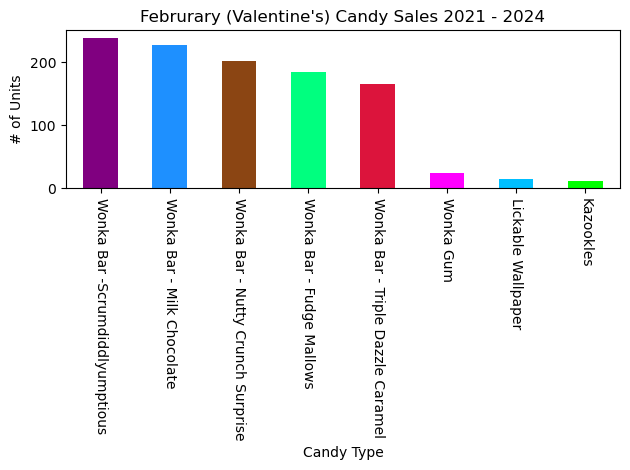

In [15]:
# plot the data
feb_data.plot(kind="bar", 
                          title="Februrary (Valentine's) Candy Sales 2021 - 2024",
                          color=["purple", "dodgerblue","saddlebrown", "springgreen", "crimson", "magenta",
                                 "deepskyblue",  "lime"])
plt.xlabel("Candy Type")
plt.ylabel("# of Units")
plt.tight_layout()
plt.xticks(rotation=-90)
plt.savefig("feb_stats.png")

In [21]:
# index all October data by month
oct_index = reduced_by_dates[reduced_by_dates["Month"] == 10]
print(oct_index)

# reset the index for data manipulation
oct_index.reset_index(drop=True, inplace=True)
oct_index

      Order Date                       Product Name  Units  Month
4     2022-10-04         Wonka Bar - Milk Chocolate      2     10
12    2021-10-24         Wonka Bar - Milk Chocolate      3     10
133   2023-10-23  Wonka Bar - Nutty Crunch Surprise      5     10
155   2021-10-31          Wonka Bar - Fudge Mallows      8     10
162   2024-10-03          Wonka Bar - Fudge Mallows      2     10
...          ...                                ...    ...    ...
10130 2024-10-09          Wonka Bar - Fudge Mallows      5     10
10154 2021-10-13         Wonka Bar - Milk Chocolate      5     10
10155 2021-10-13         Wonka Bar - Milk Chocolate      4     10
10156 2021-10-13  Wonka Bar - Nutty Crunch Surprise      4     10
10157 2021-10-13         Wonka Bar - Milk Chocolate      2     10

[843 rows x 4 columns]


,Order Date,Product Name,Units,Month
0,2022-10-04,Wonka Bar - Milk Chocolate,2,10
1,2021-10-24,Wonka Bar - Milk Chocolate,3,10
2,2023-10-23,Wonka Bar - Nutty Crunch Surprise,5,10
3,2021-10-31,Wonka Bar - Fudge Mallows,8,10
4,2024-10-03,Wonka Bar - Fudge Mallows,2,10
...,...,...,...,...
838,2024-10-09,Wonka Bar - Fudge Mallows,5,10
839,2021-10-13,Wonka Bar - Milk Chocolate,5,10
840,2021-10-13,Wonka Bar - Milk Chocolate,4,10
841,2021-10-13,Wonka Bar - Nutty Crunch Surprise,4,10


In [23]:
# Copy October DF and delete Order Date column
oct_index_copy=oct_index.copy()
oct_index_copy.drop("Order Date", axis=1, inplace=True)
oct_index_copy

,Product Name,Units,Month
0,Wonka Bar - Milk Chocolate,2,10
1,Wonka Bar - Milk Chocolate,3,10
2,Wonka Bar - Nutty Crunch Surprise,5,10
3,Wonka Bar - Fudge Mallows,8,10
4,Wonka Bar - Fudge Mallows,2,10
...,...,...,...
838,Wonka Bar - Fudge Mallows,5,10
839,Wonka Bar - Milk Chocolate,5,10
840,Wonka Bar - Milk Chocolate,4,10
841,Wonka Bar - Nutty Crunch Surprise,4,10


In [25]:
# Groupy by and assemble the resulting series into a single summary DataFrame.

oct_reduce = oct_index_copy.groupby("Product Name")["Units"].sum()
print(oct_reduce)

oct_data = oct_reduce.sort_values(ascending=False)
oct_data

Product Name
Everlasting Gobstopper                 6
Hair Toffee                            2
Kazookles                             19
Lickable Wallpaper                    60
SweeTARTS                              7
Wonka Bar - Fudge Mallows            643
Wonka Bar - Milk Chocolate           639
Wonka Bar - Nutty Crunch Surprise    528
Wonka Bar - Triple Dazzle Caramel    621
Wonka Bar -Scrumdiddlyumptious       616
Wonka Gum                             32
Name: Units, dtype: int64


Product Name
Wonka Bar - Fudge Mallows            643
Wonka Bar - Milk Chocolate           639
Wonka Bar - Triple Dazzle Caramel    621
Wonka Bar -Scrumdiddlyumptious       616
Wonka Bar - Nutty Crunch Surprise    528
Lickable Wallpaper                    60
Wonka Gum                             32
Kazookles                             19
SweeTARTS                              7
Everlasting Gobstopper                 6
Hair Toffee                            2
Name: Units, dtype: int64

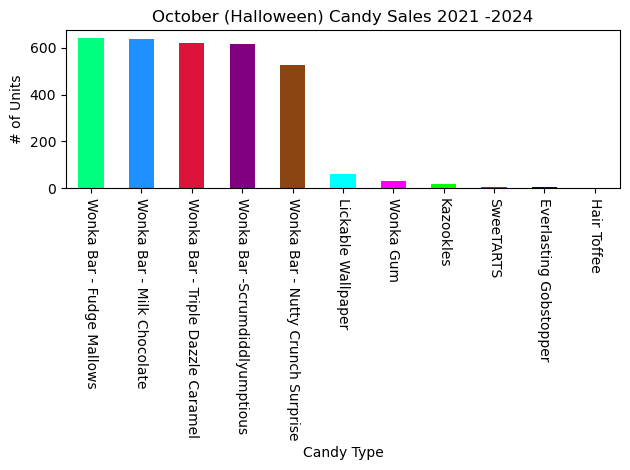

In [27]:
# plot the data
oct_chart = oct_data.plot(kind="bar", title="October (Halloween) Candy Sales 2021 -2024",
                         color=["springgreen", "dodgerblue","crimson", "purple", "saddlebrown", "cyan",
                                 "magenta",  "lime", "red", "navy","maroon"])
plt.xlabel("Candy Type")
plt.ylabel("# of Units")
plt.tight_layout()
plt.xticks(rotation=-90)
plt.savefig("oct_stats.png")